# EDA, Visualization, Predictions for Rent

**Data:** Yandex Realty logs from 2018

**Task:** predict prices for apartments for rent db on Yandex Realty website


## Pre-processing

In [1]:
# import pandas library and set options to view data right in the browser
# Assign pd for a short alias for pandas library
import pandas as pd
# set_option function fron pandas library to edit them limit for number of the displayed
# columns, width of all columns and maximum width of one column
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
pd.set_option('display.max_colwidth', 1000)

In [3]:
# let's look what is inside our data file to understand how we can export it. 
!head -n 3 ~/__DATA/E2ESML_Spring2023/data/spb.real.estate.archive.2018.tsv

offer_id	first_day_exposition	last_day_exposition	last_price	floor	open_plan	rooms	studio	area	kitchen_area	living_area	agent_fee	renovation	offer_type	category_type	unified_address	building_id
5490504238877583424	2014-11-27T00:00:00+03:00	2016-03-14T00:00:00+03:00	3676740.0	19	False	1	False	27.4	16.56	16.56		0.0	1	2	Россия, Санкт-Петербург, улица Шкапина, 9-11	3552413344225333068
5490504238903444021	2014-11-27T00:00:00+03:00	2016-04-28T00:00:00+03:00	7038880.0	2	False	3	False	85.84	19.64	41.2		0.0	1	2	Россия, Санкт-Петербург, Кушелевская дорога, 3к4	7274736308217971906


In [5]:
spb_df = pd.read_table('~/__DATA/E2ESML_Spring2023/data/spb.real.estate.archive.2018.tsv')

In [6]:
spb_df.sample(5000).to_csv('spb.real.estate.archive.sample5000.tsv', index = False, sep='\t')

In [7]:
# let's split our dataframe to rent and sell
# Select some part of dataframe according to conditions in brackets
rent_df = spb_df[spb_df.offer_type == 2]
sell_df = spb_df[spb_df.offer_type == 1]
print("Total rent data size: {}".format(len(rent_df)))
print("Total sell data size: {}".format(len(sell_df)))

Total rent data size: 171186
Total sell data size: 258001


In [8]:
# let's check median and price for renting apartments
# .last_price indicates that you use data just from the column named last_price
rent_median_price = rent_df.last_price.median()
rent_mean_price = rent_df.last_price.mean()
print("Rent median price: {}".format(rent_median_price))
print("Rent mean price: {}".format(rent_mean_price))

Rent median price: 25000.0
Rent mean price: 31719.256638977487


In [9]:
rent_df.last_price.head(10)

1086    20000.0
1096    40000.0
1097    45000.0
1149    21000.0
1514    25000.0
1515    35000.0
1516    22000.0
1537    20000.0
1555    26000.0
1695    25000.0
Name: last_price, dtype: float64

In [10]:
max_price_rent = rent_df.last_price.max()

In [11]:
print("Max price in rent: {}".format(max_price_rent))

Max price in rent: 4900000.0


In [12]:
# select all offers where price is equal to maximum value across all rent prices
rent_df_max = rent_df[rent_df.last_price == max_price_rent]

In [13]:
# Knowing real estate market in St.Petersburg we understand 
# that offers with rent prices over 1 million rubles are outliers
outliers_rent = rent_df[rent_df.last_price > 1000000]
print("Number of outliers in rent: {}".format(len(outliers_rent)))

Number of outliers in rent: 22


In [14]:
outliers_rent.sample(5)

,offer_id,first_day_exposition,last_day_exposition,last_price,floor,open_plan,rooms,studio,area,kitchen_area,living_area,agent_fee,renovation,offer_type,category_type,unified_address,building_id
38416,5340729,2016-02-08T00:00:00+03:00,2016-02-15T00:00:00+03:00,2550000.0,8,False,1,False,38.0,6.0,19.0,100.0,0.0,2,2,"Россия, Санкт-Петербург, Варшавская улица, 51к1",6532707473577967135
349765,7521881594612635746,2018-05-14T00:00:00+03:00,2018-05-21T00:00:00+03:00,4700000.0,10,False,1,False,40.3,8.3,20.0,100.0,NaN,2,2,"Россия, Санкт-Петербург, Ленинский проспект, 111к2",2371480959169104773
83893,4075481786711135488,2016-08-18T00:00:00+03:00,2016-08-18T00:00:00+03:00,3500000.0,1,False,2,False,55.0,8.3,30.5,NaN,3.0,2,2,"Россия, Ленинградская область, Всеволожск, микрорайон Южный, Центральная улица, 13",4521154714631889065
10707,3751871,2015-08-27T00:00:00+03:00,2016-05-12T00:00:00+03:00,2100000.0,2,False,2,False,49.0,7.0,NaN,90.0,3.0,2,2,"Россия, Санкт-Петербург, проспект Народного Ополчения, 179к1",2789010111420303027
29410,4944609,2015-12-23T00:00:00+03:00,2016-05-10T00:00:00+03:00,2250000.0,4,False,1,False,35.0,9.0,17.0,100.0,3.0,2,2,"Россия, Ленинградская область, Тосно, проспект Ленина, 27",4242058865805744796


In [15]:
rent_df[(rent_df.last_price > 500000) & (rent_df.last_price < 1000000)]

,offer_id,first_day_exposition,last_day_exposition,last_price,floor,open_plan,rooms,studio,area,kitchen_area,living_area,agent_fee,renovation,offer_type,category_type,unified_address,building_id
83621,6302977522903470578,2015-05-28T00:00:00+03:00,2017-04-26T00:00:00+03:00,550000.0,6,False,4,False,180.0,18.0,122.0,NaN,0.0,2,2,"Россия, Санкт-Петербург, Парадная улица, 3к1",7861463534572863507
89836,6302977522901450489,2016-09-14T00:00:00+03:00,2016-09-15T00:00:00+03:00,800000.0,2,False,2,False,80.0,20.0,40.0,NaN,0.0,2,2,"Россия, Санкт-Петербург, Большая Морская улица, 27",8010764606439654926
106222,4377907628678297857,2016-11-07T00:00:00+03:00,2017-03-13T00:00:00+03:00,600000.0,6,False,4,False,187.0,NaN,127.0,100.0,1.0,2,2,"Россия, Санкт-Петербург, Парадная улица, 3к1",7861463534572863507
172166,3376106655979657514,2017-02-24T00:00:00+03:00,2017-05-24T00:00:00+03:00,600000.0,6,False,4,False,200.0,NaN,103.0,100.0,0.0,2,2,"Россия, Санкт-Петербург, Парадная улица, 3к2",7861463534572863508
172950,1896730477252952293,2016-10-31T00:00:00+03:00,2017-05-26T00:00:00+03:00,650000.0,6,False,4,False,190.0,20.0,102.0,100.0,0.0,2,2,"Россия, Санкт-Петербург, Парадная улица, 3к1",7861463534572863507
253075,9174606537144832259,2017-11-16T00:00:00+03:00,2018-08-20T00:00:00+03:00,600000.0,1,False,4,False,165.0,NaN,115.0,NaN,6.0,2,2,"Россия, Санкт-Петербург, проспект Динамо, 6",135575281136523355
321216,2596865999798823681,2018-03-31T00:00:00+03:00,2018-04-04T00:00:00+03:00,575000.0,3,False,4,False,120.0,NaN,NaN,50.0,1.0,2,2,"Россия, Санкт-Петербург, Кременчугская улица, 17к3",9078299753075959719
323711,9106659135022232833,2018-04-03T00:00:00+03:00,2018-06-15T00:00:00+03:00,600000.0,1,False,4,False,90.0,13.0,54.0,0.0,11.0,2,2,"Россия, Санкт-Петербург, Большой Сампсониевский проспект, 33/1",192308642065385452
336616,8867625833179319559,2018-04-21T00:00:00+03:00,2018-08-09T00:00:00+03:00,600000.0,1,False,4,False,117.0,20.0,83.0,0.0,NaN,2,2,"Россия, Санкт-Петербург, проспект Динамо, 6",135575281136523355
419166,5152264856292210972,2018-02-01T00:00:00+03:00,2018-08-16T00:00:00+03:00,600000.0,1,False,4,False,140.0,95.0,100.0,100.0,NaN,2,2,"Россия, Санкт-Петербург, проспект Динамо, 6",135575281136523355


In [16]:
# Create a new column price_per_sq_m and calculate price per sq m
rent_df['price_per_sq_m'] = rent_df.last_price/rent_df.area

/tmp/ipykernel_623/816257644.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rent_df['price_per_sq_m'] = rent_df.last_price/rent_df.area


In [17]:
# find what's median and mean price per square meter in rent
median_price_per_sq_m = rent_df.price_per_sq_m.median()
mean_price_per_sq_m = rent_df.price_per_sq_m.mean()
print("Median price per sq m in rent: {}".format(median_price_per_sq_m))
print("Mean price per sq m in rent: {}".format(mean_price_per_sq_m))

Median price per sq m in rent: 550.0
Mean price per sq m in rent: 600.1110692967957


In [18]:
# For each address we then take a median of price per sq m and return a new dataframe 
# with a result
house_rent_df = rent_df.groupby('unified_address').price_per_sq_m.median().reset_index()

In [19]:
house_rent_df.head(5)

,unified_address,price_per_sq_m
0,"Россия, Ленинградская область, Бокситогорск, Комсомольская улица, 5А",171.428571
1,"Россия, Ленинградская область, Бокситогорск, Южная улица, 15",250.000000
2,"Россия, Ленинградская область, Бокситогорск, улица Металлургов, 7",164.948454
3,"Россия, Ленинградская область, Бокситогорск, улица Павлова, 37",138.888889
4,"Россия, Ленинградская область, Бокситогорский район, Пикалёво, 6-й микрорайон, 25",195.652174


In [20]:
house_rent_df.rename(columns = {'price_per_sq_m': 'house_price_sqm_median'}, inplace = True)

In [21]:
# join two dataframes
rent_df = rent_df.merge(house_rent_df)

In [22]:
# Assign outliers if price per sq m is 5 times higher than the median value in the house
outliers = rent_df[(rent_df.price_per_sq_m/rent_df.house_price_sqm_median) > 5]

In [23]:
# Let's create a new dataframe with clean data
rent_df_cleaned = rent_df[~((rent_df.price_per_sq_m/rent_df.house_price_sqm_median) > 5)]

In [24]:
# check that in the middle segment everything is fine now
rent_df_cleaned[(rent_df_cleaned.last_price > 500000) & (rent_df_cleaned.last_price < 1000000)]

,offer_id,first_day_exposition,last_day_exposition,last_price,floor,open_plan,rooms,studio,area,kitchen_area,living_area,agent_fee,renovation,offer_type,category_type,unified_address,building_id,price_per_sq_m,house_price_sqm_median
95391,3376106655979657514,2017-02-24T00:00:00+03:00,2017-05-24T00:00:00+03:00,600000.0,6,False,4,False,200.0,NaN,103.0,100.0,0.0,2,2,"Россия, Санкт-Петербург, Парадная улица, 3к2",7861463534572863508,3000.000000,1385.501355
96070,6302977522903470578,2015-05-28T00:00:00+03:00,2017-04-26T00:00:00+03:00,550000.0,6,False,4,False,180.0,18.0,122.0,NaN,0.0,2,2,"Россия, Санкт-Петербург, Парадная улица, 3к1",7861463534572863507,3055.555556,1442.307692
96075,4377907628678297857,2016-11-07T00:00:00+03:00,2017-03-13T00:00:00+03:00,600000.0,6,False,4,False,187.0,NaN,127.0,100.0,1.0,2,2,"Россия, Санкт-Петербург, Парадная улица, 3к1",7861463534572863507,3208.556150,1442.307692
96091,1896730477252952293,2016-10-31T00:00:00+03:00,2017-05-26T00:00:00+03:00,650000.0,6,False,4,False,190.0,20.0,102.0,100.0,0.0,2,2,"Россия, Санкт-Петербург, Парадная улица, 3к1",7861463534572863507,3421.052632,1442.307692
154614,9174606537144832259,2017-11-16T00:00:00+03:00,2018-08-20T00:00:00+03:00,600000.0,1,False,4,False,165.0,NaN,115.0,NaN,6.0,2,2,"Россия, Санкт-Петербург, проспект Динамо, 6",135575281136523355,3636.363636,3636.363636
154615,8867625833179319559,2018-04-21T00:00:00+03:00,2018-08-09T00:00:00+03:00,600000.0,1,False,4,False,117.0,20.0,83.0,0.0,NaN,2,2,"Россия, Санкт-Петербург, проспект Динамо, 6",135575281136523355,5128.205128,3636.363636
154617,5152264856292210972,2018-02-01T00:00:00+03:00,2018-08-16T00:00:00+03:00,600000.0,1,False,4,False,140.0,95.0,100.0,100.0,NaN,2,2,"Россия, Санкт-Петербург, проспект Динамо, 6",135575281136523355,4285.714286,3636.363636


In [25]:
# look at offers with price > 1 000 000
rent_df_cleaned[(rent_df_cleaned.last_price >= 1000000)]

,offer_id,first_day_exposition,last_day_exposition,last_price,floor,open_plan,rooms,studio,area,kitchen_area,living_area,agent_fee,renovation,offer_type,category_type,unified_address,building_id,price_per_sq_m,house_price_sqm_median
67005,5199154,2016-01-25T00:00:00+03:00,2016-01-26T00:00:00+03:00,3800000.0,3,False,2,False,51.0,6.0,30.5,NaN,0.0,2,2,"Россия, Санкт-Петербург, Пискарёвский проспект, 149",7757194067653498771,74509.803922,74509.803922
95935,8743101202301731585,2016-10-13T00:00:00+03:00,2016-11-12T00:00:00+03:00,1500000.0,3,False,2,False,54.7,NaN,NaN,NaN,7.0,2,2,"Россия, Ленинградская область, Выборгский район, Светогорское городское поселение, поселок городского типа Лесогорский, улица Труда, 7",2755098623625145659,27422.303473,13811.700183
114024,4075481786711135488,2016-08-18T00:00:00+03:00,2016-08-18T00:00:00+03:00,3500000.0,1,False,2,False,55.0,8.3,30.5,NaN,3.0,2,2,"Россия, Ленинградская область, Всеволожск, микрорайон Южный, Центральная улица, 13",4521154714631889065,63636.363636,63636.363636
164662,4088017598264857345,2018-02-09T00:00:00+03:00,2018-03-21T00:00:00+03:00,1330000.0,3,False,1,False,33.0,6.0,19.0,NaN,3.0,2,2,"Россия, Ленинградская область, Луга, проспект Урицкого, 65",1792010144615909485,40303.030303,40303.030303


In [26]:
# we see, that all of them are outliers, they were not cleaned by the house price per sq m median 
# because it was the only one or just one of two offers per house
# let's clean them also
# Store result in the same dataframe
rent_df_cleaned = rent_df_cleaned[rent_df_cleaned.last_price < 1000000]

In [27]:
# let's examine apartments with big price per sq m
rent_df_cleaned[rent_df_cleaned.price_per_sq_m > 3000]

,offer_id,first_day_exposition,last_day_exposition,last_price,floor,open_plan,rooms,studio,area,kitchen_area,living_area,agent_fee,renovation,offer_type,category_type,unified_address,building_id,price_per_sq_m,house_price_sqm_median
549,8596035942924139265,2018-05-17T00:00:00+03:00,2018-07-04T00:00:00+03:00,450000.0,6,False,2,False,106.0,15.0,65.0,30.0,NaN,2,2,"Россия, Санкт-Петербург, Воскресенская набережная, 4",7262659557693263963,4245.283019,975.609756
28182,1492050389917501301,2017-06-07T00:00:00+03:00,2017-06-07T00:00:00+03:00,195000.0,4,False,1,False,57.0,8.0,19.0,100.0,0.0,2,2,"Россия, Санкт-Петербург, проспект Добролюбова, 2",6684242979485775735,3421.052632,779.220779
39213,3793550987719225600,2017-03-19T00:00:00+03:00,2017-11-02T00:00:00+03:00,310000.0,3,False,4,False,100.0,14.0,71.0,100.0,1.0,2,2,"Россия, Санкт-Петербург, Лиговский проспект, 123",2861706125080798064,3100.000000,976.307190
44574,1896730477284436579,2017-05-31T00:00:00+03:00,2017-05-31T00:00:00+03:00,230000.0,9,False,2,False,67.0,14.0,30.0,100.0,0.0,2,2,"Россия, Санкт-Петербург, Глухая Зеленина улица, 6",6445545084936583797,3432.835821,923.076923
96070,6302977522903470578,2015-05-28T00:00:00+03:00,2017-04-26T00:00:00+03:00,550000.0,6,False,4,False,180.0,18.0,122.0,NaN,0.0,2,2,"Россия, Санкт-Петербург, Парадная улица, 3к1",7861463534572863507,3055.555556,1442.307692
96075,4377907628678297857,2016-11-07T00:00:00+03:00,2017-03-13T00:00:00+03:00,600000.0,6,False,4,False,187.0,NaN,127.0,100.0,1.0,2,2,"Россия, Санкт-Петербург, Парадная улица, 3к1",7861463534572863507,3208.556150,1442.307692
96091,1896730477252952293,2016-10-31T00:00:00+03:00,2017-05-26T00:00:00+03:00,650000.0,6,False,4,False,190.0,20.0,102.0,100.0,0.0,2,2,"Россия, Санкт-Петербург, Парадная улица, 3к1",7861463534572863507,3421.052632,1442.307692
99409,7102677476104578816,2016-05-20T00:00:00+03:00,2016-05-20T00:00:00+03:00,270000.0,1,False,1,False,80.0,NaN,NaN,0.0,3.0,2,2,"Россия, Санкт-Петербург, Загородный проспект, 5",8810747501928407960,3375.000000,1978.197674
104668,159653575951184384,2016-06-16T00:00:00+03:00,2016-07-01T00:00:00+03:00,300000.0,2,False,3,False,54.0,8.0,35.0,50.0,11.0,2,2,"Россия, Санкт-Петербург, 18-я линия В.О., 43",6003296125598219505,5555.555556,5555.555556
150701,1492050390917641037,2016-10-28T00:00:00+03:00,2017-06-07T00:00:00+03:00,400000.0,4,False,3,False,130.0,13.0,85.0,100.0,0.0,2,2,"Россия, Санкт-Петербург, Константиновский проспект, 23",5091810811209082905,3076.923077,3484.848485


In [28]:
# we can see that outliers are those which are in houses with price per sq m below 1000 rubles, 
# and those which are the same with median, in which case it's the only offer per house
outliers_count = len(rent_df_cleaned[(rent_df_cleaned.price_per_sq_m > 3000) 
                                     & ((rent_df_cleaned.house_price_sqm_median < 1000) 
                                        | (rent_df_cleaned.house_price_sqm_median == rent_df_cleaned.price_per_sq_m))])
print("outliers found: {}".format(outliers_count))
rent_df_cleaned = rent_df_cleaned[~((rent_df_cleaned.price_per_sq_m > 3000) 
                                     & ((rent_df_cleaned.house_price_sqm_median < 1000) 
                                        | (rent_df_cleaned.house_price_sqm_median == rent_df_cleaned.price_per_sq_m)))]

outliers found: 8


In [29]:
# now max price should be correct, lets look at this offer
max_rent_apartment = rent_df_cleaned[rent_df_cleaned.last_price == rent_df_cleaned.last_price.max()]
max_rent_apartment

,offer_id,first_day_exposition,last_day_exposition,last_price,floor,open_plan,rooms,studio,area,kitchen_area,living_area,agent_fee,renovation,offer_type,category_type,unified_address,building_id,price_per_sq_m,house_price_sqm_median
96091,1896730477252952293,2016-10-31T00:00:00+03:00,2017-05-26T00:00:00+03:00,650000.0,6,False,4,False,190.0,20.0,102.0,100.0,0.0,2,2,"Россия, Санкт-Петербург, Парадная улица, 3к1",7861463534572863507,3421.052632,1442.307692


In [30]:
# let's look at house address
max_rent_apartment.unified_address.iloc[0]

'Россия, Санкт-Петербург, Парадная улица, 3к1'

In [31]:
import urllib

In [32]:
# Create a new dataframe with houses and median price per sq m
# This time it should with the data calculated without outliers
house_rent_df_cleaned = rent_df_cleaned.groupby('unified_address').price_per_sq_m.median().reset_index()
house_rent_df_cleaned.rename(columns = {'price_per_sq_m': 'house_price_sqm_median_cleaned'}, inplace = True)

In [33]:
most_expensive_house = house_rent_df_cleaned[house_rent_df_cleaned.house_price_sqm_median_cleaned == house_rent_df_cleaned.house_price_sqm_median_cleaned.max()]
most_expensive_house

,unified_address,house_price_sqm_median_cleaned
16851,"Россия, Санкт-Петербург, проспект Динамо, 6",3705.357143


In [34]:
most_cheapest_house = house_rent_df_cleaned[house_rent_df_cleaned.house_price_sqm_median_cleaned == house_rent_df_cleaned.house_price_sqm_median_cleaned.min()]
most_cheapest_house

,unified_address,house_price_sqm_median_cleaned
2421,"Россия, Ленинградская область, Кириши, улица Мира, 14",50.0


In [35]:
# we see that it's located in Leningrad Oblast, let's look only in St. Petersburg data
house_rent_df_cleaned_spb = house_rent_df_cleaned[house_rent_df_cleaned.unified_address.str.contains('Россия, Санкт-Петербург')]
house_rent_df_cleaned_spb[house_rent_df_cleaned_spb.house_price_sqm_median_cleaned == house_rent_df_cleaned_spb.house_price_sqm_median_cleaned.min()]

,unified_address,house_price_sqm_median_cleaned
4852,"Россия, Санкт-Петербург, Большая Зеленина улица, 12",76.923077


In [36]:
# consider only data inside the city without oblast
rent_df_cleaned_spb = rent_df_cleaned[rent_df_cleaned.unified_address.str.contains('Россия, Санкт-Петербург')]
median_price_per_sq_m_in_spb = rent_df_cleaned_spb.price_per_sq_m.median()
print("Median price per sq m in St. Petersburg in rent: {}".format(median_price_per_sq_m_in_spb))

Median price per sq m in St. Petersburg in rent: 555.5555555555555


In [37]:
# look at cheap apartments which are more than two times cheaper 
# than the median value of offers we calculated above (555)
rent_df_cleaned_spb[rent_df_cleaned_spb.price_per_sq_m < 250].sample(10)

,offer_id,first_day_exposition,last_day_exposition,last_price,floor,open_plan,rooms,studio,area,kitchen_area,living_area,agent_fee,renovation,offer_type,category_type,unified_address,building_id,price_per_sq_m,house_price_sqm_median
131538,3954506054109548544,2017-01-08T00:00:00+03:00,2017-01-14T00:00:00+03:00,16000.0,7,False,3,False,80.0,19.0,70.0,80.0,0.0,2,2,"Россия, Санкт-Петербург, Пушкинский район, посёлок Шушары, территория Славянка, Изборская улица, 3к1",7727526934365677155,200.000000,310.226493
120872,2156639669342768640,2017-12-27T00:00:00+03:00,2018-01-23T00:00:00+03:00,19000.0,4,False,3,False,78.0,NaN,NaN,50.0,NaN,2,2,"Россия, Санкт-Петербург, Пушкинский район, посёлок Шушары, территория Славянка, Ростовская улица, 14-16",4153179922410625475,243.589744,264.912281
106615,3653332947260070401,2016-07-01T00:00:00+03:00,2016-07-08T00:00:00+03:00,11000.0,3,False,2,False,71.0,9.0,42.0,50.0,3.0,2,2,"Россия, Санкт-Петербург, Красное Село, Нагорная улица, 37",4011485438398100794,154.929577,183.098592
167198,449582579548435712,2018-05-07T00:00:00+03:00,2018-06-07T00:00:00+03:00,17000.0,1,False,3,False,75.0,12.0,42.0,NaN,3.0,2,2,"Россия, Санкт-Петербург, Пушкинский район, посёлок Шушары, территория Славянка, Галицкая улица, 19к4",7337575385391293648,226.666667,318.461538
152012,1951683259311989504,2018-04-23T00:00:00+03:00,2018-07-29T00:00:00+03:00,16000.0,7,False,2,False,65.0,NaN,NaN,50.0,NaN,2,2,"Россия, Санкт-Петербург, Пушкинский район, посёлок Шушары, территория Славянка, Колпинское шоссе, 40к1",7936294240150873018,246.153846,265.822785
153908,5174057564827906304,2018-03-28T00:00:00+03:00,2018-04-27T00:00:00+03:00,13000.0,3,False,2,False,66.0,NaN,NaN,1.0,NaN,2,2,"Россия, Санкт-Петербург, Пушкинский район, посёлок Шушары, территория Славянка, Галицкая улица, 6к2",236695980173877152,196.969697,342.307692
160059,3247546020307487233,2017-11-10T00:00:00+03:00,2017-11-12T00:00:00+03:00,18000.0,2,False,3,False,112.0,12.0,65.0,100.0,0.0,2,2,"Россия, Санкт-Петербург, Пушкинский район, посёлок Шушары, территория Славянка, Ростовская улица, 4к4",897860344996779230,160.714286,249.627144
153444,5141797489723476716,2018-04-17T00:00:00+03:00,2018-05-29T00:00:00+03:00,20000.0,13,False,3,False,92.0,13.0,53.0,50.0,NaN,2,2,"Россия, Санкт-Петербург, проспект Королёва, 69",756291893985037349,217.391304,538.461538
116799,8889987492329982209,2017-04-22T00:00:00+03:00,2017-04-22T00:00:00+03:00,16000.0,6,False,4,False,111.0,14.0,65.1,NaN,10.0,2,2,"Россия, Санкт-Петербург, Большой проспект Петроградской стороны, 69",7955965937352639036,144.144144,590.909091
135457,8759793603528490752,2017-06-28T00:00:00+03:00,2017-07-12T00:00:00+03:00,15000.0,9,False,2,False,62.0,11.0,30.0,NaN,3.0,2,2,"Россия, Санкт-Петербург, Пушкинский район, посёлок Шушары, территория Славянка, Ростовская улица, 19/3",9059817452517872600,241.935484,333.333333


In [38]:
# it seems that we should clean all apartments where median price is at least 2x higher and cheap 
outliers = rent_df_cleaned_spb[(rent_df_cleaned_spb.price_per_sq_m < 250) 
                               & (rent_df_cleaned_spb.house_price_sqm_median/rent_df_cleaned_spb.price_per_sq_m >= 2)]

In [39]:
print("number of cheap outliers 2x cheaper: {}".format(len(outliers)))

number of cheap outliers 2x cheaper: 100


In [40]:
# clean outliers
rent_df_cleaned_spb = rent_df_cleaned_spb[~((rent_df_cleaned_spb.price_per_sq_m < 250) 
                               & (rent_df_cleaned_spb.house_price_sqm_median/rent_df_cleaned_spb.price_per_sq_m >= 2))]

In [41]:
# look at cheap apartments which were not cleaned with the previous heuristics
rent_df_cleaned_spb[rent_df_cleaned_spb.price_per_sq_m < 200]

,offer_id,first_day_exposition,last_day_exposition,last_price,floor,open_plan,rooms,studio,area,kitchen_area,living_area,agent_fee,renovation,offer_type,category_type,unified_address,building_id,price_per_sq_m,house_price_sqm_median
46867,4857633,2015-12-13T00:00:00+03:00,2016-06-05T00:00:00+03:00,12000.0,6,False,3,False,61.0,7.0,42.0,80.0,3.0,2,2,"Россия, Санкт-Петербург, Красное Село, Стрельнинское шоссе, 6к3",1523555400005784785,196.721311,256.578947
57861,4975278,2015-12-27T00:00:00+03:00,2016-01-12T00:00:00+03:00,13000.0,4,False,3,False,78.0,10.0,47.0,NaN,10.0,2,2,"Россия, Санкт-Петербург, 12-я Красноармейская улица, 7",6204918944542168630,166.666667,166.666667
80404,2939523434608526081,2018-03-06T00:00:00+03:00,2018-03-13T00:00:00+03:00,15000.0,6,False,3,False,87.0,NaN,NaN,NaN,3.0,2,2,"Россия, Санкт-Петербург, Окраинная улица, 9В",4510539508387660402,172.413793,241.715116
85844,249021112485953840,2016-03-21T00:00:00+03:00,2016-07-05T00:00:00+03:00,12000.0,3,False,4,False,112.0,14.0,16.0,NaN,0.0,2,2,"Россия, Санкт-Петербург, Свеаборгская улица, 23",4943588578198944211,107.142857,107.142857
91302,8176284694677069056,2016-05-18T00:00:00+03:00,2016-05-18T00:00:00+03:00,14000.0,4,False,3,False,74.0,10.0,NaN,50.0,3.0,2,2,"Россия, Санкт-Петербург, Пушкинский район, посёлок Шушары, квартал Славянка, Ростовская улица, 6к3",4976238169808254780,189.189189,291.963016
101249,5379909360861020417,2016-06-02T00:00:00+03:00,2016-06-09T00:00:00+03:00,14000.0,3,False,3,False,80.0,12.0,NaN,80.0,0.0,2,2,"Россия, Санкт-Петербург, Пушкинский район, посёлок Шушары, квартал Славянка, Ростовская улица, 27",5194982532050895016,175.000000,233.333333
105186,801981697508642560,2016-06-20T00:00:00+03:00,2016-06-29T00:00:00+03:00,12000.0,6,False,5,False,156.0,23.0,16.0,50.0,11.0,2,2,"Россия, Санкт-Петербург, Большая Зеленина улица, 12",7137635118733633172,76.923077,76.923077
105957,6302976505020612958,2016-06-25T00:00:00+03:00,2016-11-08T00:00:00+03:00,17000.0,4,False,3,False,100.0,16.0,20.0,50.0,0.0,2,2,"Россия, Санкт-Петербург, Центральный район, улица Некрасова, 38",4677861887331789522,170.000000,170.000000
106615,3653332947260070401,2016-07-01T00:00:00+03:00,2016-07-08T00:00:00+03:00,11000.0,3,False,2,False,71.0,9.0,42.0,50.0,3.0,2,2,"Россия, Санкт-Петербург, Красное Село, Нагорная улица, 37",4011485438398100794,154.929577,183.098592
120839,2164881834443110913,2017-05-07T00:00:00+03:00,2017-05-14T00:00:00+03:00,15000.0,5,False,3,False,93.0,10.0,54.0,100.0,0.0,2,2,"Россия, Санкт-Петербург, Пушкинский район, посёлок Шушары, территория Славянка, Ростовская улица, 14-16",4153179922410625475,161.290323,264.912281


In [42]:
# there are cases where houses had just one offer and house median equals offer's price per square meter
# let's remove these outliers
rent_df_cleaned_spb = rent_df_cleaned_spb[~((rent_df_cleaned_spb.price_per_sq_m < 200) 
                                          & (rent_df_cleaned_spb.price_per_sq_m == rent_df_cleaned_spb.house_price_sqm_median))]

In [43]:
# look at the cheapest apartment
cheapest_offer = rent_df_cleaned_spb[rent_df_cleaned_spb.price_per_sq_m == rent_df_cleaned_spb.price_per_sq_m.min()]
cheapest_offer

,offer_id,first_day_exposition,last_day_exposition,last_price,floor,open_plan,rooms,studio,area,kitchen_area,living_area,agent_fee,renovation,offer_type,category_type,unified_address,building_id,price_per_sq_m,house_price_sqm_median
106615,3653332947260070401,2016-07-01T00:00:00+03:00,2016-07-08T00:00:00+03:00,11000.0,3,False,2,False,71.0,9.0,42.0,50.0,3.0,2,2,"Россия, Санкт-Петербург, Красное Село, Нагорная улица, 37",4011485438398100794,154.929577,183.098592


In [44]:
house_rent_df_cleaned_spb = rent_df_cleaned_spb.groupby('unified_address').price_per_sq_m.median().reset_index()
house_rent_df_cleaned_spb.rename(columns = {'price_per_sq_m': 'house_price_sqm_median_cleaned'}, inplace = True)
cheapest_house = house_rent_df_cleaned_spb[house_rent_df_cleaned_spb.house_price_sqm_median_cleaned == house_rent_df_cleaned_spb.house_price_sqm_median_cleaned.min()]
cheapest_house

,unified_address,house_price_sqm_median_cleaned
5245,"Россия, Санкт-Петербург, Красное Село, Нагорная улица, 37",183.098592


In [46]:
# Some offers has commision fee for the agent (agent_fee)
rent_df_cleaned_spb.agent_fee.value_counts(normalize=True, dropna=False)

100.000000    0.328129
50.000000     0.293380
NaN           0.209340
0.000000      0.035378
90.000000     0.034537
                ...   
14.000000     0.000006
11.000000     0.000006
17.000000     0.000006
92.000000     0.000006
64.997665     0.000006
Name: agent_fee, Length: 102, dtype: float64

## Visualization

/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='last_price'>

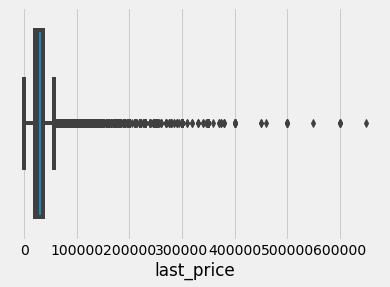

In [54]:
sns.boxplot(rent_df_cleaned['last_price'])

In [56]:
def visualize_property(df, feature):
    fig, axs = plt.subplots(3, figsize = (8,10))
    #Histogram plot
    axs[0].set_title('Histogram')
    df[feature].hist(ax = axs[0])
    #QQ plot 
    axs[1].set_title('QQ')
    stats.probplot(df[feature], plot=axs[1])
    ##Box plot 
    axs[2].set_title("Box plot")
    sns.boxplot(df[feature], ax = axs[2])
    print("Skewness: %f" % df[feature].skew())
    print("Kurtosis: %f" % df[feature].kurt())

/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Skewness: 5.278235
Kurtosis: 52.926213


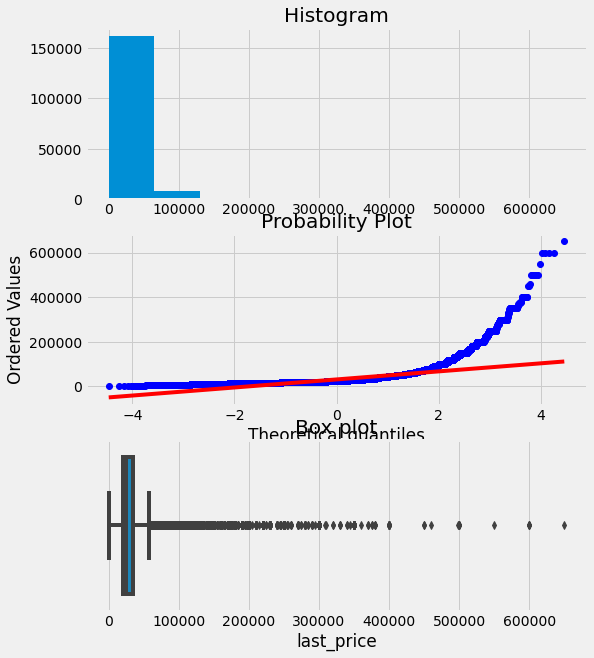

In [57]:
visualize_property(rent_df_cleaned,'last_price')

<AxesSubplot:>

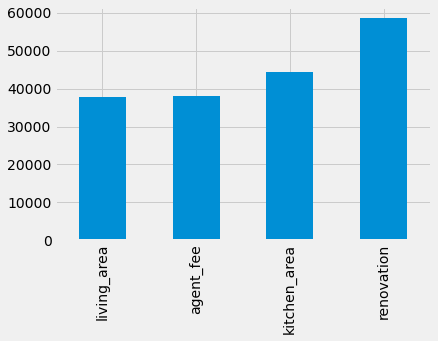

In [59]:
missing = rent_df_cleaned.isnull().sum()
missing = missing[missing>0]
missing.sort_values(inplace=True)
missing.plot.bar()

In [60]:
rent_df_cleaned.drop(columns=['offer_id','price_per_sq_m','house_price_sqm_median'], inplace=True)

<AxesSubplot:>

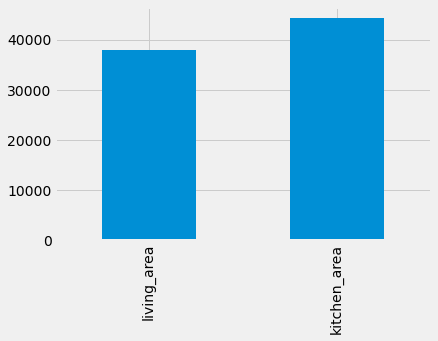

In [65]:
missing = rent_df_cleaned.isnull().sum()
missing = missing[missing>0]
missing.sort_values(inplace=True)
missing.plot.bar()

In [62]:
rent_df_cleaned.drop(columns=['category_type','offer_type'], inplace=True)

In [63]:
rent_df_cleaned.drop(columns=['agent_fee'], inplace=True)

In [64]:
rent_df_cleaned['renovation'].fillna(0.0, inplace=True)

/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='last_price', ylabel='area'>

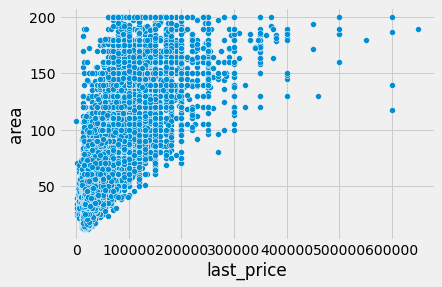

In [66]:
sns.scatterplot(rent_df_cleaned['last_price'], rent_df_cleaned['area'])

/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='last_price', ylabel='renovation'>

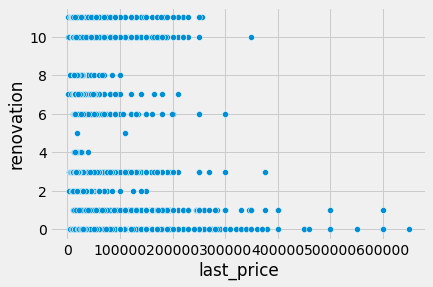

In [67]:
sns.scatterplot(rent_df_cleaned['last_price'], rent_df_cleaned['renovation'])

/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='last_price', ylabel='rooms'>

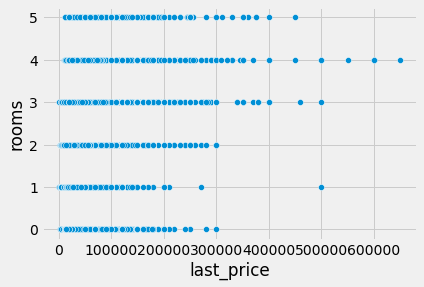

In [68]:
style.use('fivethirtyeight')
sns.scatterplot(rent_df_cleaned['last_price'], rent_df_cleaned['rooms'])

/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='last_price', ylabel='floor'>

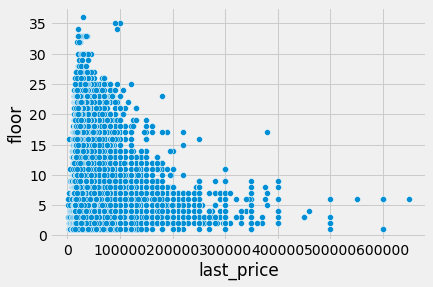

In [69]:
rent_df_cleaned = rent_df_cleaned[rent_df_cleaned['floor']<40]
sns.scatterplot(rent_df_cleaned['last_price'], rent_df_cleaned['floor'])

<AxesSubplot:>

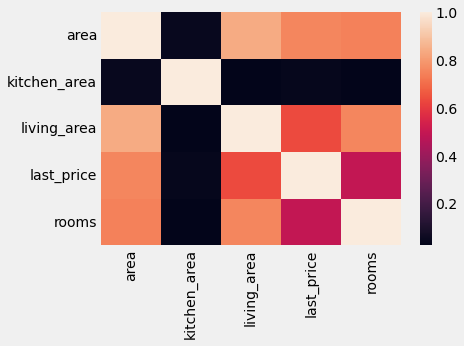

In [70]:
sns.heatmap(rent_df_cleaned[['area','kitchen_area','living_area','last_price','rooms']].corr())

In [71]:
categorical = ['floor','open_plan','rooms','renovation','studio']

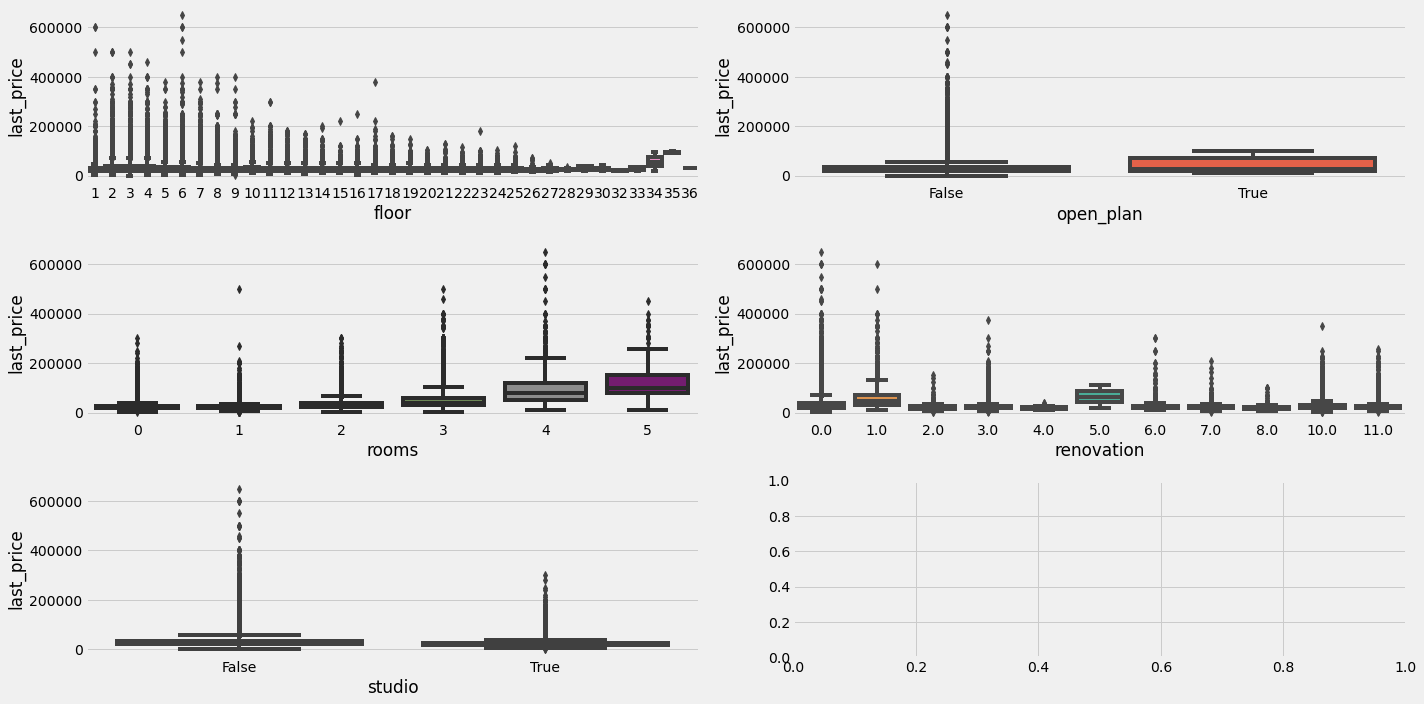

In [72]:
fig, axes = plt.subplots(nrows=3,ncols=2, figsize = (20,10))
for idx, feat in enumerate(categorical):
    ax = axes[int(idx/2),idx%2]
    sns.boxplot(x=feat, y='last_price', data=rent_df_cleaned, ax=ax)
    ax.set_xlabel(feat)
fig.tight_layout()

In [73]:
rent_df_cleaned['open_plan'] = rent_df_cleaned['open_plan'].astype('int')
rent_df_cleaned['studio'] = rent_df_cleaned['studio'].astype('int')

In [74]:
unified_address = rent_df_cleaned.pop('unified_address')


In [75]:
rent_df_cleaned.drop(columns=['kitchen_area','living_area','building_id','floor','studio'], inplace=True)

In [76]:
rent_df_cleaned.head()

,first_day_exposition,last_day_exposition,last_price,open_plan,rooms,area,renovation
0,2015-01-24T00:00:00+03:00,2016-01-19T00:00:00+03:00,20000.0,0,1,28.0,3.0
1,2015-11-17T00:00:00+03:00,2016-03-04T00:00:00+03:00,24000.0,0,2,59.0,3.0
2,2015-11-17T00:00:00+03:00,2016-04-24T00:00:00+03:00,18000.0,0,1,36.0,3.0
3,2016-02-04T00:00:00+03:00,2016-02-28T00:00:00+03:00,18000.0,0,1,39.0,0.0
4,2016-02-28T00:00:00+03:00,2016-04-02T00:00:00+03:00,19000.0,0,1,36.0,11.0


## Model building

In [77]:
# lets set options to be able to view data right in the browser
import pandas as pd
import seaborn as sns
import scipy.stats as stats
import matplotlib.style as style
from matplotlib import pyplot as plt
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
pd.set_option('display.max_colwidth', 1000)
style.use('fivethirtyeight')
import numpy as np

In [78]:
rent_df_cleaned['renovation'] = rent_df_cleaned['renovation'].astype(int)

In [79]:
rent_df_cleaned.head()

,first_day_exposition,last_day_exposition,last_price,open_plan,rooms,area,renovation
0,2015-01-24T00:00:00+03:00,2016-01-19T00:00:00+03:00,20000.0,0,1,28.0,3
1,2015-11-17T00:00:00+03:00,2016-03-04T00:00:00+03:00,24000.0,0,2,59.0,3
2,2015-11-17T00:00:00+03:00,2016-04-24T00:00:00+03:00,18000.0,0,1,36.0,3
3,2016-02-04T00:00:00+03:00,2016-02-28T00:00:00+03:00,18000.0,0,1,39.0,0
4,2016-02-28T00:00:00+03:00,2016-04-02T00:00:00+03:00,19000.0,0,1,36.0,11


In [80]:
rent_df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 171124 entries, 0 to 171185
Data columns (total 7 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   first_day_exposition  171124 non-null  object 
 1   last_day_exposition   171124 non-null  object 
 2   last_price            171124 non-null  float64
 3   open_plan             171124 non-null  int64  
 4   rooms                 171124 non-null  int64  
 5   area                  171124 non-null  float64
 6   renovation            171124 non-null  int64  
dtypes: float64(2), int64(3), object(2)
memory usage: 14.5+ MB


In [81]:
# select all offers added the first 3 months of 2018 as train dataset.
# '&' means 'and' and should be used when both conditions are satisfied
# pay attention that it's better always to put conditions in brackets to embrace the right priority of operations
train_df = rent_df_cleaned[(rent_df_cleaned.first_day_exposition >= '2018-01-01') 
                          & (rent_df_cleaned.first_day_exposition < '2018-04-01')]

In [82]:
# select all offers added in april and may 2018 as test dataset.
test_df = rent_df_cleaned[(rent_df_cleaned.first_day_exposition >= '2018-04-01') 
                          & (rent_df_cleaned.first_day_exposition < '2018-06-01')]

In [83]:
# let's use latest data from 2018-06-01 as a hodout dataset to simulate how algorithms would
# behave in production
holdout_df = rent_df_cleaned[rent_df_cleaned.first_day_exposition >= '2018-06-01']

In [85]:
train_df.drop(columns=['first_day_exposition','last_day_exposition'], inplace=True)
test_df.drop(columns=['first_day_exposition','last_day_exposition'], inplace=True)



/opt/conda/lib/python3.9/site-packages/pandas/core/frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [86]:
train_df.head()

,last_price,open_plan,rooms,area,renovation
8,26000.0,0,1,36.0,0
24,17500.0,0,1,32.0,1
25,16000.0,0,1,38.0,0
26,22000.0,0,1,32.0,0
27,20000.0,0,1,32.0,0


### XGBoost with GridSearch

In [90]:
from xgboost import XGBRegressor 
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn import metrics
from sklearn.ensemble import RandomForestRegressor

In [91]:
X_train = train_df.drop('last_price', axis=1)
y_train = train_df['last_price']
X_valid = test_df.drop('last_price', axis=1)
y_valid = test_df['last_price']
y_train= y_train.values.reshape(-1,1)
y_valid= y_valid.values.reshape(-1,1)

In [92]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
sc_y = StandardScaler()

X_train = sc_X.fit_transform(X_train)
X_valid = sc_X.fit_transform(X_valid)
y_train = sc_y.fit_transform(y_train)
y_valid = sc_y.fit_transform(y_valid)

In [93]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
sc_y = StandardScaler()

X_train = sc_X.fit_transform(X_train)
X_valid = sc_X.fit_transform(X_valid)
y_train = sc_y.fit_transform(y_train)
y_valid = sc_y.fit_transform(y_valid)

In [94]:
X_train.shape, y_train.shape

((20068, 4), (20068, 1))

In [95]:
xgb = XGBRegressor() 

param_grid = {'n_estimators': [50, 100, 200],
              'max_depth': [3, 4, 5],
              'learning_rate': [0.01, 0.1, 0.2]}

grid_search = GridSearchCV(xgb, param_grid, cv=5, n_jobs=-1)

grid_search.fit(X_valid, y_valid)

print("Best parameters: ", grid_search.best_params_)
print("Best score: ", grid_search.best_score_)

Best parameters:  {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 50}
Best score:  0.5631176221286283


In [96]:
xgb = XGBRegressor(learning_rate=0.1, max_depth=3, n_estimators=50) 
xgb.fit(X_train, y_train)

xgb_predictions = xgb.predict(X_valid)

predictions1 = sc_y.inverse_transform(xgb_predictions[:5])
values = test_df['last_price']
for pred, val in zip(predictions1,values):
    print("Prediction: {}, True Value {}".format(pred, val))

Prediction: -0.32921069860458374, True Value 19000.0
Prediction: -0.03803950548171997, True Value 29000.0
Prediction: 0.8115294575691223, True Value 45000.0
Prediction: 0.008380011655390263, True Value 35000.0
Prediction: 0.01777600683271885, True Value 35000.0


In [97]:
print('MAE:', metrics.mean_absolute_error(y_valid, xgb_predictions))
print('MSE:', metrics.mean_squared_error(y_valid, xgb_predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_valid, xgb_predictions)))

MAE: 0.30477241568606467
MSE: 0.4047815717095601
RMSE: 0.6362244664499787


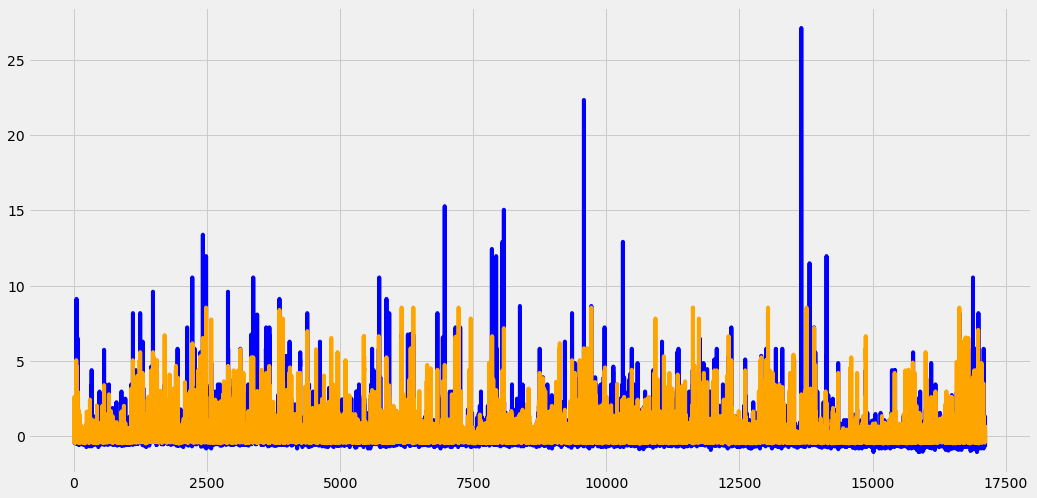

In [98]:
plt.figure(figsize=(16,8))
plt.plot(sc_y.inverse_transform(y_valid),label ='Test', color= 'blue')
plt.plot(sc_y.inverse_transform(xgb_predictions), label = 'predict', color = 'orange')
plt.show()

### SVR on default params

In [99]:
from sklearn.svm import SVR

svr = SVR(kernel='linear') 
svr.fit(X_train, y_train)

/opt/conda/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


SVR(kernel='linear')

In [100]:
svr_predictions = svr.predict(X_valid)

In [101]:
predictions2 = sc_y.inverse_transform(svr_predictions[:5])
values = test_df['last_price']
for pred, val in zip(predictions2,values):
    print("Prediction: {}, True Value {}".format(pred, val))

Prediction: -0.33986923667279656, True Value 19000.0
Prediction: -0.03306979199157288, True Value 29000.0
Prediction: 0.6178968007447296, True Value 45000.0
Prediction: -0.0468353293983234, True Value 35000.0
Prediction: 0.004297911381735698, True Value 35000.0


In [102]:
print('MAE:', metrics.mean_absolute_error(y_valid, svr_predictions))
print('MSE:', metrics.mean_squared_error(y_valid, svr_predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_valid, svr_predictions)))

MAE: 0.31501614338398626
MSE: 0.5106158914306964
RMSE: 0.7145739229993608


## Saving best

In [ ]:
import joblib

In [ ]:
model_file = 'model.pkl'
scaler_x = 'scaler_x.pkl'
scaler_y = 'scaler_y.pkl'
joblib.dump(sc_X, scaler_x)
joblib.dump(sc_y, scaler_y)
joblib.dump(xgb, model_file)